In [216]:
import pandas as pd
import numpy as np
import verde as vd
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline

In [217]:
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch
import rasterio.plot
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

fu = rasterio.open("ftunion2864.tif")
la = rasterio.open("lance2864.tif")
tfuwells = gpd.read_file(r"D:\predictions\shapefiles\('Kl', 'Tfu')_KNN_predictions.shp")
klawells = gpd.read_file(r"D:\predictions\shapefiles\('Kfh', 'Kl')_KNN_predictions.shp")
lance = gpd.read_file(r'shapefiles/lance_outcrop.shp')
ftun = gpd.read_file(r'shapefiles/ftunion_outcrop.shp')
faults = gpd.read_file(r'shapefiles/simp_faults.shp')
sections = gpd.read_file(r'shapefiles/crossection.shp',)

In [241]:
e[0].max()

4961

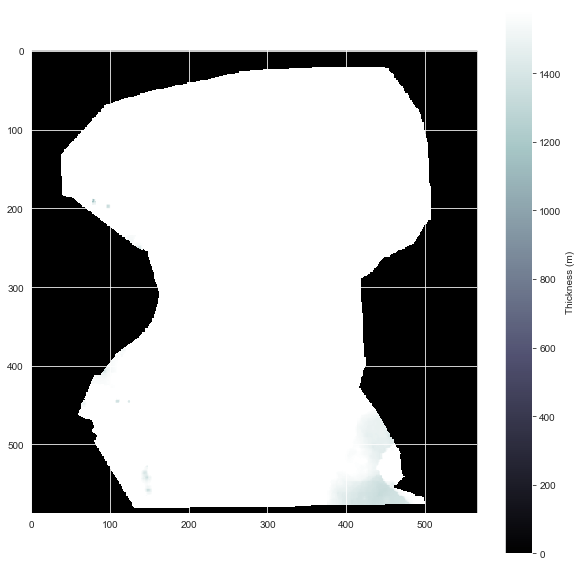

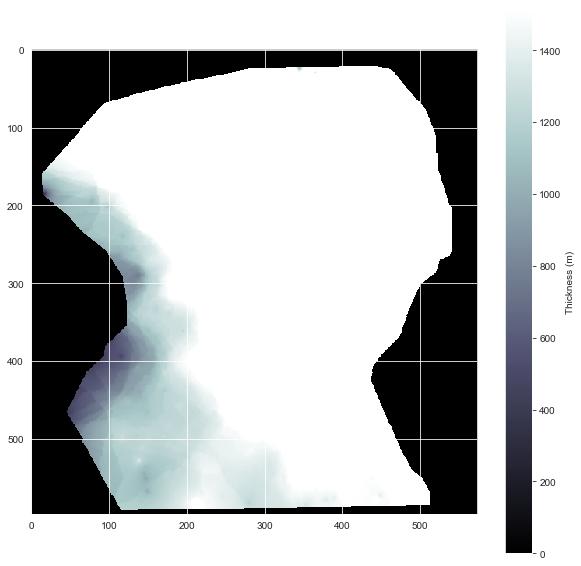

In [242]:
filepath = "ftunion2864.tif"
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(filepath) as src:
    e = src.read().astype(int)
plt.imshow(e[0], cmap='bone', vmin=0, vmax=5200*0.3048)
plt.colorbar(label='Thickness (m)')
plt.savefig('fortunioncolorbar.pdf')

filepath = "lance2864.tif"
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(filepath) as src:
    e = src.read().astype(int)
plt.imshow(e[0], cmap='bone', vmin=0, vmax=4961*0.3048)
plt.colorbar(label='Thickness (m)')
plt.savefig('lancecolorbar.pdf')

In [220]:
tfuwells = tfuwells.to_crs({'init': 'epsg:2864'})
klawells = klawells.to_crs({'init': 'epsg:2864'})
lance = lance.to_crs({'init': 'epsg:2864'})
ftun = ftun.to_crs({'init': 'epsg:2864'})
faults = faults.to_crs({'init':'epsg:2864'})
sections = sections.to_crs({'init':'epsg:2864'})

In [221]:
tfuwells.probabilit
newscore = 50 * (tfuwells.probabilit)

In [222]:
tfuwells['newprob'] = newscore
klawells['newprob'] = newscore

In [223]:
futruncation = tfuwells[tfuwells['prediction']== 0]
fuonlap = tfuwells[tfuwells['prediction']== 1]
fuhorizontal = tfuwells[tfuwells['prediction']== 2]

In [224]:
latruncation = klawells[klawells['prediction']== 0]
laonlap = klawells[klawells['prediction']== 1]
lahorizontal = klawells[klawells['prediction']== 2]

Text(62.77698857196546, 0.5, 'Northing (m)')

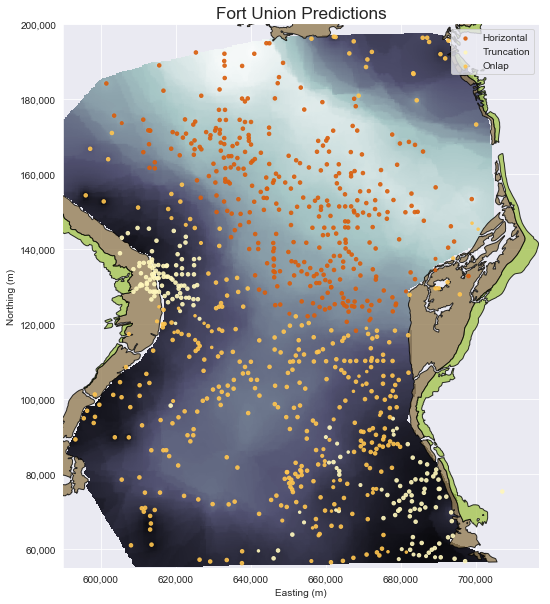

In [334]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(fu, ax=ax, cmap='bone', zorder=1)
#rasterio.plot.show(fu, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f', 'colors':'black'}, zorder=2)
fuhorizontal.plot(ax=ax, markersize=fuhorizontal['newprob']/4, color='#d95f0e', label='Horizontal', legend=True, alpha=0.9, zorder=6)
futruncation.plot(ax=ax, markersize=futruncation['newprob']/4, color='#fff7bc', label='Truncation', legend=True, alpha=0.9, zorder=4)
fuonlap.plot(ax=ax, markersize=fuonlap['newprob']/4, color='#fec44f', label='Onlap', legend=True, alpha=0.9, zorder=5)
ftun.plot(ax=ax, color='#957F56', edgecolor='black', zorder=3, label='Fort Union Outcrop', alpha=0.8, legend=True)
lance.plot(ax=ax, color='#A6C551', edgecolor='black', zorder=3, alpha=0.8)
plt.legend()
plt.title('Fort Union Predictions', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
#plt.savefig('fortunion.pdf', bbox_inches='tight')


Text(62.77698857196546, 0.5, 'Northing (m)')

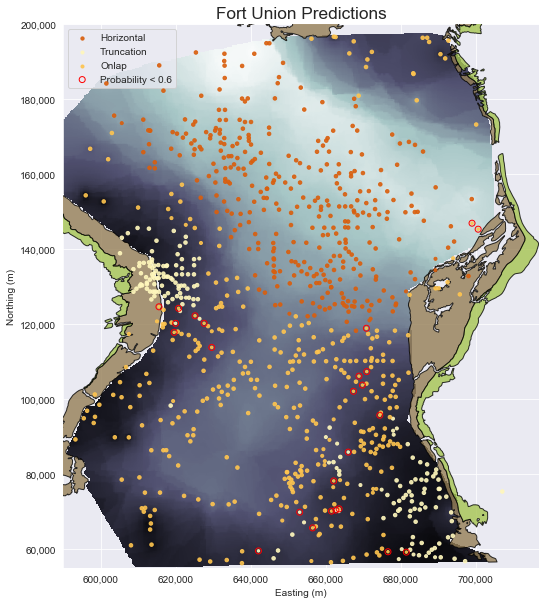

In [347]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(fu, ax=ax, cmap='bone', zorder=1)
#rasterio.plot.show(fu, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f', 'colors':'black'}, zorder=2)
fuhorizontal.plot(ax=ax, markersize=fuhorizontal['newprob']/4, color='#d95f0e', label='Horizontal', legend=True, alpha=0.9, zorder=6)
futruncation.plot(ax=ax, markersize=futruncation['newprob']/4, color='#fff7bc', label='Truncation', legend=True, alpha=0.9, zorder=4)
fuonlap.plot(ax=ax, markersize=fuonlap['newprob']/4, color='#fec44f', label='Onlap', legend=True, alpha=0.9, zorder=5)
ftun.plot(ax=ax, color='#957F56', edgecolor='black', zorder=3, label='Fort Union Outcrop', alpha=0.8, legend=True)
lance.plot(ax=ax, color='#A6C551', edgecolor='black', zorder=3, alpha=0.8)
tfuwells[tfuwells.probabilit < 0.6].plot(ax=ax, zorder=7, color='none', edgecolor='red', label='Probability < 0.6')

plt.legend()
plt.title('Fort Union Predictions', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
#plt.savefig('fortunion.pdf', bbox_inches='tight')



Text(52.56722301134839, 0.5, 'Northing (m)')

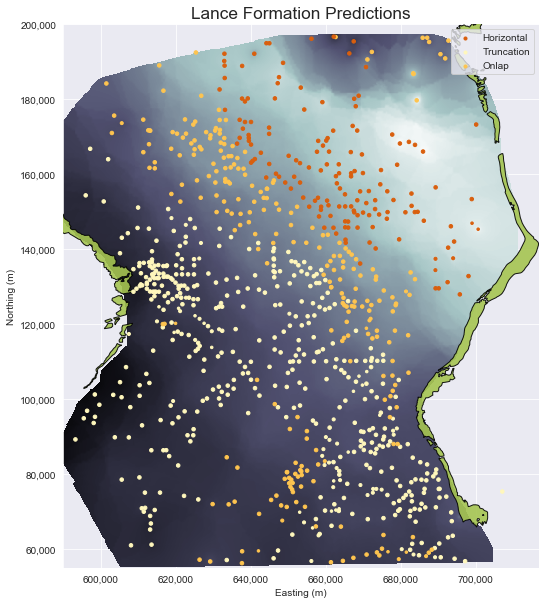

In [333]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(la, ax=ax, cmap='bone', zorder=1)
#rasterio.plot.show(la, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f'}, zorder=2)
lahorizontal.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='#d95f0e', label='Horizontal', legend=True, zorder=6)
latruncation.plot(ax=ax, markersize=latruncation['newprob']/4, color='#fff7bc', label='Truncation', legend=True, zorder=4)
laonlap.plot(ax=ax, markersize=laonlap['newprob']/4, color='#fec44f', label='Onlap', legend=True, zorder=5)
lance.plot(ax=ax, color='#A6C551', edgecolor='black', zorder=3, alpha=0.9)
plt.legend()
plt.title('Lance Formation Predictions', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
#plt.savefig('lance.pdf', bbox_inches='tight')

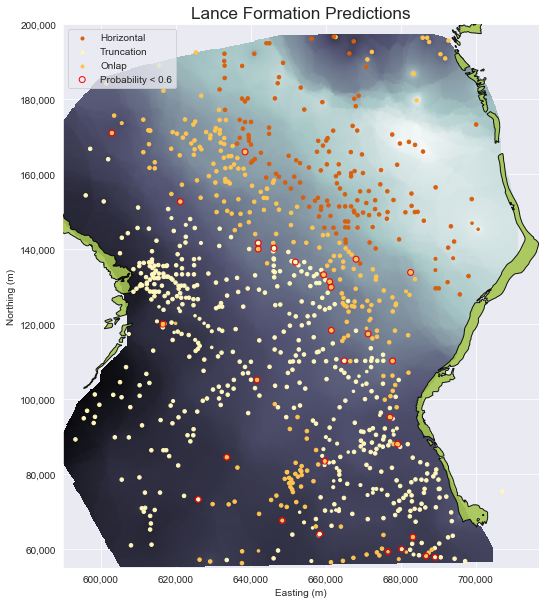

In [346]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
rasterio.plot.show(la, ax=ax, cmap='bone', zorder=1)
lahorizontal.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='#d95f0e', label='Horizontal', legend=True, zorder=6)
latruncation.plot(ax=ax, markersize=latruncation['newprob']/4, color='#fff7bc', label='Truncation', legend=True, zorder=4)
laonlap.plot(ax=ax, markersize=laonlap['newprob']/4, color='#fec44f', label='Onlap', legend=True, zorder=5)
klawells[klawells.probabilit < 0.6].plot(ax=ax, zorder=7, color='none', edgecolor='red', label='Probability < 0.6')
lance.plot(ax=ax, color='#A6C551', edgecolor='black', zorder=3, alpha=0.9)
plt.legend()
plt.title('Lance Formation Predictions', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.savefig('lance_prob.pdf', bbox_inches='tight')

In [281]:
klawells['form'] = 'Kl'
tfuwells['form'] ='Tfu'
full = pd.DataFrame(klawells.append(tfuwells))

In [ ]:
full.preds.plot(kind='bar', stacked=True,)

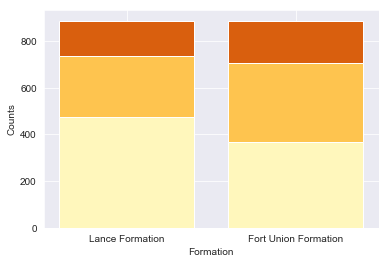

In [298]:

names = ('Lance Formation','Fort Union Formation')
plt.bar([0], klawells.prediction.value_counts().values[0], color='#fff7bc')
plt.bar([0], klawells.prediction.value_counts().values[1],color='#fec44f', bottom=klawells.prediction.value_counts().values[0])
plt.bar([0], klawells.prediction.value_counts().values[2], color='#d95f0e', 
        bottom=klawells.prediction.value_counts().values[0]+klawells.prediction.value_counts().values[1])

plt.bar([1], tfuwells.prediction.value_counts().values[0], color='#fff7bc')
plt.bar([1], tfuwells.prediction.value_counts().values[1],color='#fec44f', bottom=tfuwells.prediction.value_counts().values[0])
plt.bar([1], tfuwells.prediction.value_counts().values[2], color='#d95f0e', 
        bottom=tfuwells.prediction.value_counts().values[0]+tfuwells.prediction.value_counts().values[1])



plt.xticks([0,1], names)
plt.xlabel("Formation")
plt.ylabel('Counts')
plt.savefig('valuecounts histogram.pdf')

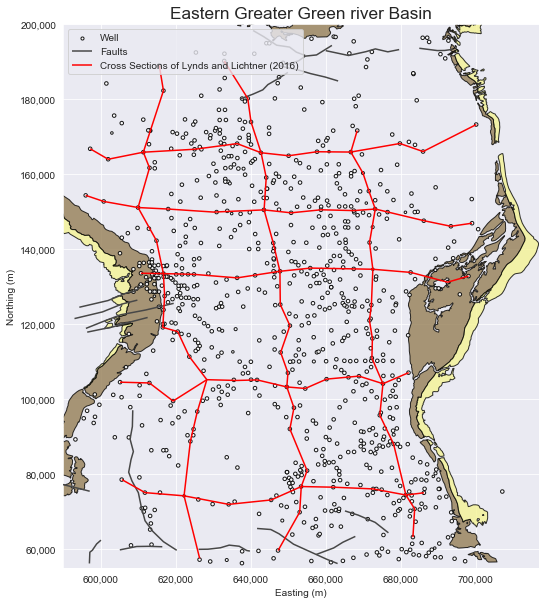

In [299]:
y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_major_formatter(y_format)
tfuwells.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='white', edgecolor='k', label='Well', legend=True, alpha=0.9, zorder=3)
ftun.plot(ax=ax, color='#957F56', edgecolor='black', zorder=1, label='Fort Union Outcrop', alpha=0.8, legend=True)
lance.plot(ax=ax, color='#F5F494', edgecolor='black', zorder=2,label='Lance Outcrop', alpha=0.8, legend=True)
faults.plot(ax=ax, color='#474747', label='Faults', legend=True, zorder=4)
sections.plot(ax=ax, color='red', label='Cross Sections of Lynds and Lichtner (2016)', legend=True, zorder=5)
plt.legend()
plt.title('Eastern Greater Green river Basin', size='xx-large')
plt.xlim(590000, 717000)
plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.savefig('easternbasin.pdf')